In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ab_data = pd.read_csv('data/ab_data.csv')

In [7]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [8]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [9]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [10]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [11]:
daily_data['conversion'] = (daily_data['converted'] / daily_data['users_count']) * 100
daily_data[daily_data['timestamp'] == '2017-01-05']

,timestamp,group,users_count,converted,conversion
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964


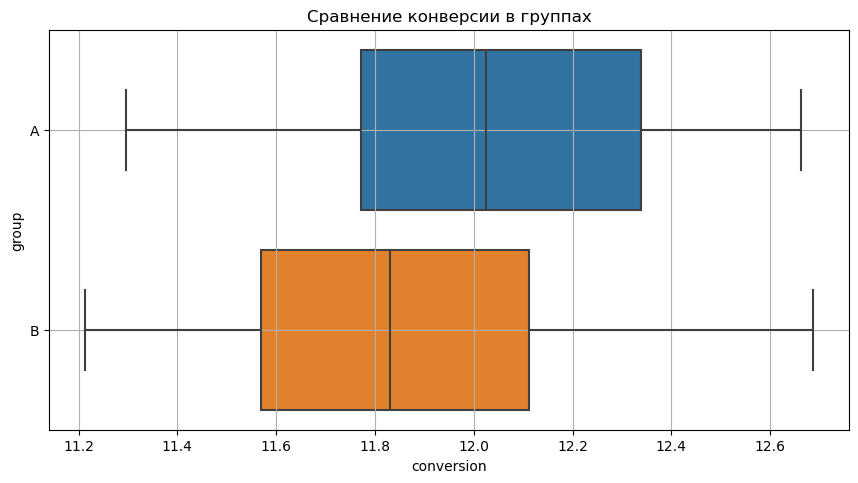

In [12]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid(True);

In [13]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/si

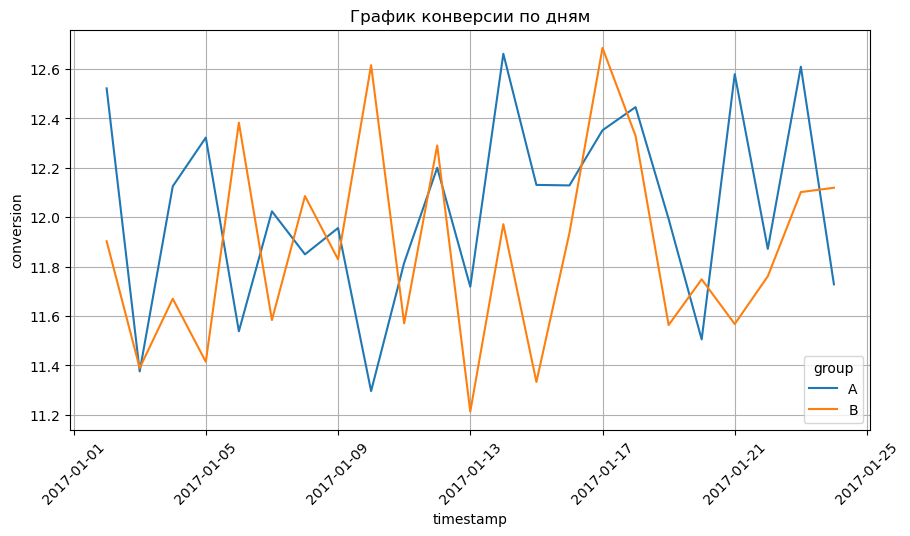

In [14]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid(True);

In [15]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

/tmp/ipykernel_8452/906787284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [16]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/si

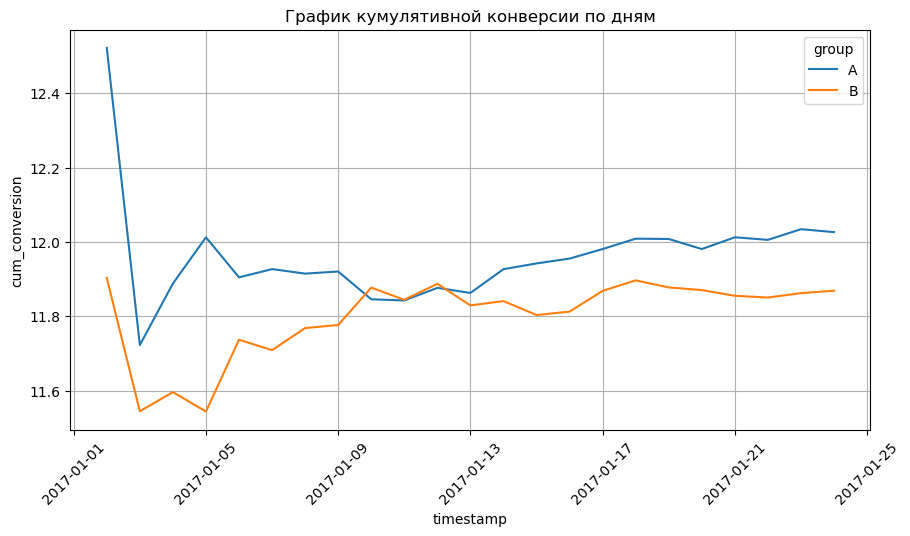

In [17]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [18]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [19]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61571 non-null  object 
 1   cid           61571 non-null  float64
 2   transactions  61571 non-null  int64  
 3   revenue       61571 non-null  int64  
 4   group         61571 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [20]:
sample_a.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [21]:
sample_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61383 non-null  object 
 1   cid           61383 non-null  float64
 2   transactions  61383 non-null  int64  
 3   revenue       61383 non-null  int64  
 4   group         61383 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [22]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_a.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [23]:
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')
sample_b.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B


In [24]:
daily_data_a = sample_a.groupby(['date','group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
daily_data_a[daily_data_a['date'] == '2020-11-08']

,date,group,users_count,transactions,revenue
2,2020-11-08,A,3354,25,846051


In [25]:
daily_data_a['cum_users'] = daily_data_a['users_count'].cumsum()
daily_data_a['cum_transactions'] = daily_data_a['transactions'].cumsum()
daily_data_a['cum_revenue'] = daily_data_a['revenue'].cumsum()
daily_data_a['cum_conversion'] = daily_data_a['cum_transactions']/daily_data_a['cum_users']*100
daily_data_a['cum_med_revenue'] = daily_data_a['cum_revenue']/daily_data_a['cum_transactions']
daily_data_a.head()

,date,group,users_count,transactions,revenue,cum_users,cum_transactions,cum_revenue,cum_conversion,cum_med_revenue
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
1,2020-11-07,A,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2,2020-11-08,A,3354,25,846051,8634,64,4145216,0.741256,64769.000000
3,2020-11-09,A,3234,18,708830,11868,82,4854046,0.690934,59195.682927
4,2020-11-10,A,3022,29,826984,14890,111,5681030,0.745467,51180.450450


In [26]:
daily_data_a.describe()

,date,users_count,transactions,revenue,cum_users,cum_transactions,cum_revenue,cum_conversion,cum_med_revenue
count,18,18.000000,18.000000,1.800000e+01,18.000000,18.000000,1.800000e+01,18.000000,18.000000
mean,2020-11-14 12:00:00,3420.611111,24.500000,1.439393e+06,31565.777778,225.111111,1.342567e+07,0.712755,61811.778016
min,2020-11-06 00:00:00,2576.000000,16.000000,6.078390e+05,2576.000000,16.000000,1.577279e+06,0.621118,47769.410811
25%,2020-11-10 06:00:00,3180.500000,19.250000,8.785308e+05,15694.500000,115.750000,5.983444e+06,0.697298,53122.118157
50%,2020-11-14 12:00:00,3326.000000,25.000000,1.197698e+06,30563.500000,228.500000,1.209160e+07,0.715186,61248.519020
75%,2020-11-18 18:00:00,3623.750000,28.500000,1.685734e+06,47722.500000,332.500000,2.124403e+07,0.737138,63546.750619
max,2020-11-23 00:00:00,4766.000000,36.000000,4.213774e+06,61571.000000,441.000000,2.590907e+07,0.751144,98579.937500
std,NaN,522.629116,5.680203,8.744887e+05,19118.443755,134.761615,8.412216e+06,0.030864,12337.452018


In [27]:
daily_data_b = sample_b.groupby(['date','group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
daily_data_b['cum_users'] = daily_data_b['users_count'].cumsum()
daily_data_b['cum_transactions'] = daily_data_b['transactions'].cumsum()
daily_data_b['cum_revenue'] = daily_data_b['revenue'].cumsum()
daily_data_b['cum_conversion'] = daily_data_b['cum_transactions']/daily_data_b['cum_users']*100
daily_data_b['cum_med_revenue'] = daily_data_b['cum_revenue']/daily_data_b['cum_transactions']
daily_data_b.describe()

,date,users_count,transactions,revenue,cum_users,cum_transactions,cum_revenue,cum_conversion,cum_med_revenue
count,18,18.000000,18.000000,1.800000e+01,18.000000,18.000000,1.800000e+01,18.000000,18.000000
mean,2020-11-14 12:00:00,3410.166667,25.722222,1.803019e+06,31382.166667,238.611111,1.680666e+07,0.762178,68761.464914
min,2020-11-06 00:00:00,2499.000000,15.000000,5.554990e+05,2499.000000,19.000000,9.966450e+05,0.716576,40845.894737
25%,2020-11-10 06:00:00,3088.500000,22.000000,1.088686e+06,15530.000000,122.500000,9.186480e+06,0.739915,67769.493571
50%,2020-11-14 12:00:00,3283.500000,25.500000,1.644390e+06,30271.500000,248.500000,1.741597e+07,0.757292,70347.393430
75%,2020-11-18 18:00:00,3578.000000,29.750000,2.403544e+06,47515.250000,354.750000,2.479053e+07,0.777756,71918.951604
max,2020-11-23 00:00:00,4883.000000,37.000000,3.555727e+06,61383.000000,463.000000,3.245434e+07,0.830037,85275.359712
std,NaN,549.937777,5.998093,8.370312e+05,19062.711705,141.509983,9.972823e+06,0.031678,9385.897416


/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


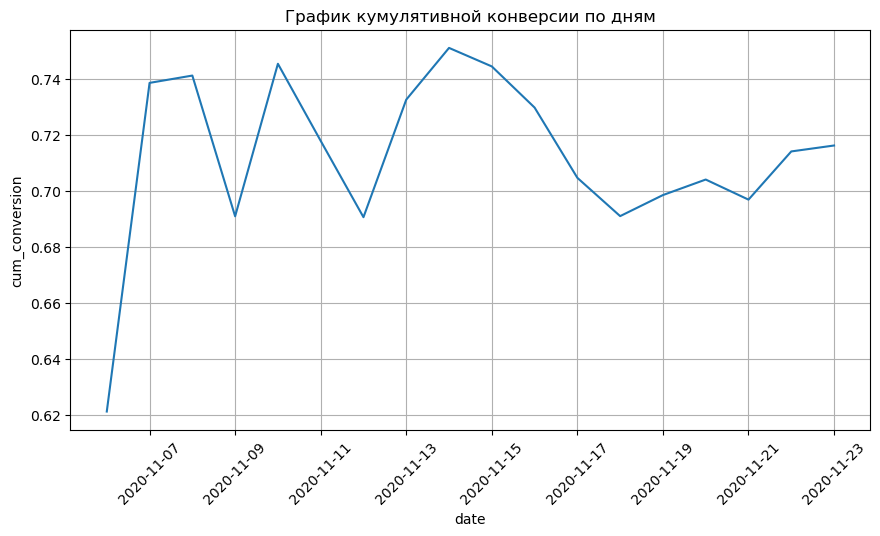

In [28]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=daily_data_a, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


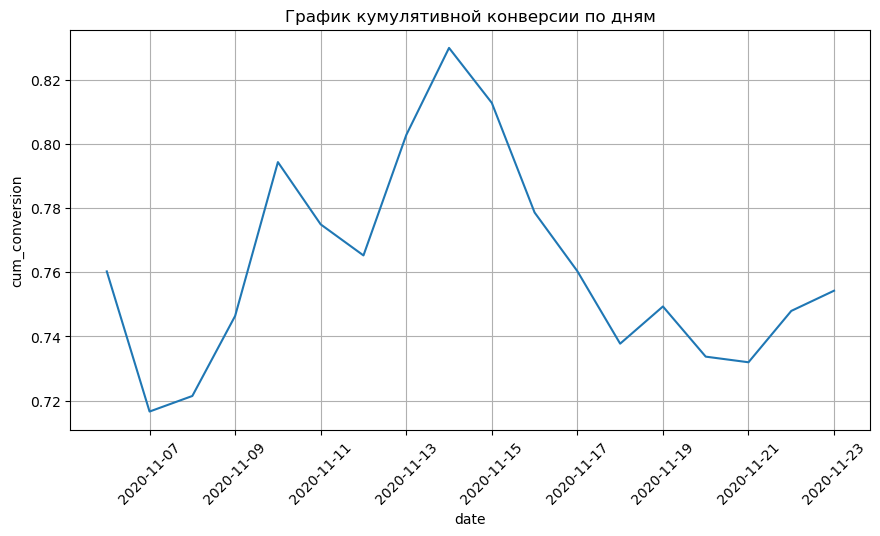

In [29]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=daily_data_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

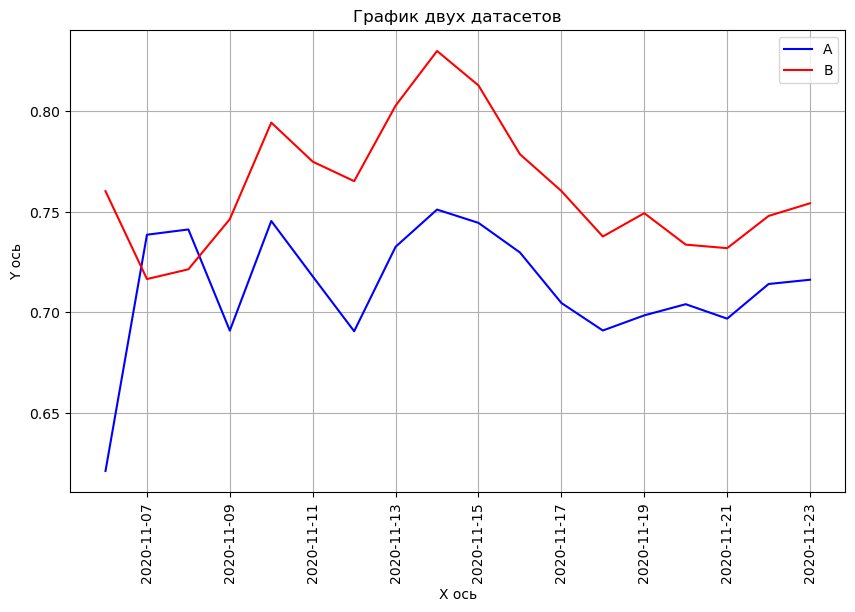

In [30]:
plt.figure(figsize=(10, 6))  # Опционально: задать размер графика

# Построение первого датасета
plt.plot(daily_data_a['date'], daily_data_a['cum_conversion'], label='A', color='blue')

# Построение второго датасета
plt.plot(daily_data_b['date'], daily_data_b['cum_conversion'], label='B', color='red')

# Настройка графика
plt.title('График двух датасетов')
plt.xlabel('X ось')
plt.ylabel('Y ось')
plt.legend()  # Добавление легенды
plt.grid(True)  # Включение сетки

plt.xticks(rotation=90)

# Показать график
plt.show()


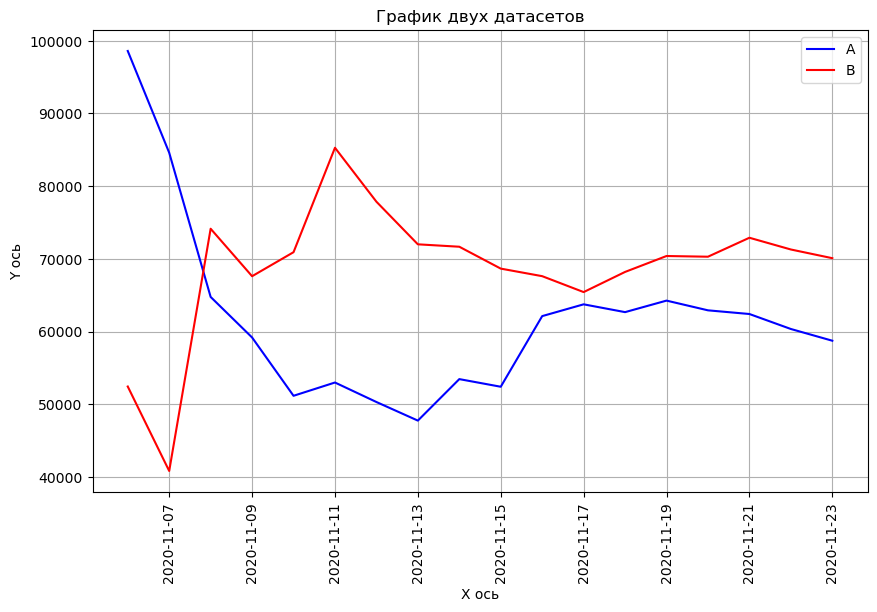

In [31]:
plt.figure(figsize=(10, 6))  # Опционально: задать размер графика

# Построение первого датасета
plt.plot(daily_data_a['date'], daily_data_a['cum_med_revenue'], label='A', color='blue')

# Построение второго датасета
plt.plot(daily_data_b['date'], daily_data_b['cum_med_revenue'], label='B', color='red')

# Настройка графика
plt.title('График двух датасетов')
plt.xlabel('X ось')
plt.ylabel('Y ось')
plt.legend()  # Добавление легенды
plt.grid(True)  # Включение сетки

plt.xticks(rotation=90)

# Показать график
plt.show()

In [32]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [33]:
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,17467,145241
B,17238,145241


In [34]:
from statsmodels.stats.proportion import proportions_ztest

In [35]:
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число «успехов»
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='two-sided',
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

# p-value:  0.19
# У нас нет оснований отвергнуть нулевую гипотезу

p-value:  0.19
У нас нет оснований отвергнуть нулевую гипотезу


In [36]:
from statsmodels.stats.proportion import proportions_chisquare

In [37]:
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для Z-теста для пропорций
_, p_value, c = proportions_chisquare(
    count=converted_piv['sum'], #число «успехов»
    nobs=converted_piv['count'] #общее число наблюдений
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

# p-value:  0.19
# У нас нет оснований отвергнуть нулевую гипотезу

p-value:  0.19
У нас нет оснований отвергнуть нулевую гипотезу


In [38]:
time_data = pd.read_excel('data/time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


In [39]:
time_data[['time(A)', 'time(B)']].agg(['mean', 'median'])

,time(A),time(B)
mean,492.90,595.406667
median,482.25,600.400000


/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dwarf/miniconda3/envs/diplom_env_conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


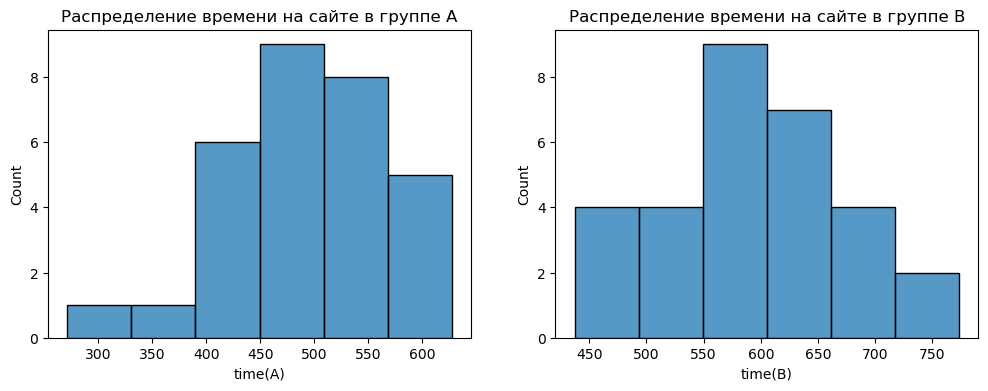

In [40]:
# создаём два графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
# задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

In [41]:
from scipy.stats import shapiro

In [42]:
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе B является нормальным")

# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределение в группе А является нормальным
# Принимаем нулевую гипотезу. Распределение в группе B является нормальным

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределение в группе А является нормальным
Принимаем нулевую гипотезу. Распределение в группе B является нормальным


In [43]:
from scipy.stats import ttest_ind

In [44]:
alpha = 0.05 #уровень значимости
# вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'],
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

# p-value: 0.0
# Отвергаем нулевую гипотезу в пользу альтернативной

p-value: 0.0
Отвергаем нулевую гипотезу в пользу альтернативной


In [45]:
from scipy.stats import mannwhitneyu

In [46]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

# преобразуем тип столбца date к типу datetime
sample_a['date'] = pd.to_datetime(sample_a['date'])
sample_b['date'] = pd.to_datetime(sample_b['date'])

combined_df = pd.concat([sample_a, sample_b], axis=0, ignore_index=True)

In [47]:
combined_df.sample(10)

,date,cid,transactions,revenue,group
122379,2020-11-23,6.834583e+08,0,0,B
1057,2020-11-06,1.794411e+09,0,0,A
26438,2020-11-14,1.674592e+09,0,0,A
58831,2020-11-23,1.413448e+09,0,0,A
23229,2020-11-13,1.869754e+09,0,0,A
55628,2020-11-22,1.478542e+09,0,0,A
52116,2020-11-21,1.232214e+09,0,0,A
8755,2020-11-09,1.077021e+09,0,0,A
118590,2020-11-22,5.086861e+08,0,0,B
100408,2020-11-17,1.779750e+09,0,0,B


In [48]:
sample_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61383 non-null  datetime64[ns]
 1   cid           61383 non-null  float64       
 2   transactions  61383 non-null  int64         
 3   revenue       61383 non-null  int64         
 4   group         61383 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [49]:
converted_piv= combined_df.groupby('group')['transactions'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,441,61571
B,463,61383


In [50]:
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число «успехов»
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='two-sided',
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

# p-value:  0.19
# У нас нет оснований отвергнуть нулевую гипотезу

p-value:  0.435
У нас нет оснований отвергнуть нулевую гипотезу


In [51]:
daily_sample_a = sample_a.groupby('date')[['transactions', 'revenue']].sum()
daily_sample_a['mean_check'] = daily_sample_a['revenue']/daily_sample_a['transactions']
daily_sample_b = sample_b.groupby('date')[['transactions', 'revenue']].sum()
daily_sample_b['mean_check'] = daily_sample_b['revenue']/daily_sample_a['transactions']

In [52]:
from scipy.stats import shapiro

In [53]:
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = shapiro(daily_sample_a['mean_check'])
shapiro_result_b = shapiro(daily_sample_b['mean_check'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе B является нормальным")

p-value группы А 0.01
p-value группы B 0.03
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального


In [54]:
alpha = 0.05 # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=daily_sample_a['mean_check'],
    y=daily_sample_b['mean_check'],
    alternative='less' # изменили альтернативную гипотезу
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 0.06
У нас нет оснований отвергнуть нулевую гипотезу


In [57]:
n = 64 # размер выборки
x_mean = 12.35 # выборочное среднее
sigma = 2.4 # истинное стандартное отклонение
gamma = 0.9 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [58]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z-критическое
print(z_crit)

1.6448536269514729


In [60]:
# строим доверительный интервал
lower, upper = norm.interval(gamma, loc=x_mean, scale=sigma / n**0.5)
print('Доверительный интервал: {}'.format((round(lower, 2), round(upper, 2))))
# Доверительный интервал: (12180, 20020)

Доверительный интервал: (11.86, 12.84)


In [65]:
n = 25 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 3540 # выборочное среднее
x_std = 1150 # выборочное стандартное отклонение
gamma = 0.9 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [62]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое
print(t_crit)

2.1447866879169273


In [63]:
def t_mean_conf_interval(x_mean, x_std, n, gamma=0.95):  
    alpha = 1 - gamma # уровень значимости
    t_crit = -t.ppf(alpha/2, k) # t-критическое
    eps = t_crit * x_std/(n ** 0.5) # погрешность
    lower_bound = x_mean - eps # левая (нижняя) граница
    upper_bound = x_mean + eps # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

# cтроим доверительный интервал для среднего при неизвестном СКО
lower_bound, upper_bound = t_mean_conf_interval(x_mean, x_std, n)

# выводим результат
print('Доверительный интервал: {}'.format((round(lower_bound), round(upper_bound))))

Доверительный интервал: (1778, 2222)


In [66]:
# строим доверительный интервал для среднего при неизвестном СКО
lower, upper = t.interval(gamma, df=k, loc=x_mean, scale=x_std/(n ** 0.5))
print('Доверительный интервал: {}'.format((round(lower), round(upper))))
# Доверительный интервал: (1778, 2222)

Доверительный интервал: (3146, 3934)


In [67]:
ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [68]:
# фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
# фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

In [69]:
def proportion_conf_interval(x_p, n, gamma=0.95):  
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z-критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 # погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

In [70]:
# строим доверительный интервал для конверсии в группе А
lower_bound_a, upper_bound_a  = proportion_conf_interval(
    x_p=a_data['converted'].mean(), # выборочная пропорция
    n=a_data['user_id'].count() # размер выборки
)

# строим доверительный интервал для конверсии в группе B
lower_bound_b, upper_bound_b  = proportion_conf_interval(
    x_p=b_data['converted'].mean(), # выборочная пропорция
    n=b_data['user_id'].count() # размер выборки
)

# выводим результат
print('Доверительный интервал для конверсии в группе А: {}'.format((round(lower_bound_a * 100, 2), round(upper_bound_a * 100, 2))))
print('Доверительный интервал для конверсии в группе B: {}'.format((round(lower_bound_b * 100, 2), round(upper_bound_b * 100, 2))))

Доверительный интервал для конверсии в группе А: (11.86, 12.19)
Доверительный интервал для конверсии в группе B: (11.7, 12.03)


In [71]:
from statsmodels.stats import proportion

# вычисляем доверительный интервал для конверсии в группе A с уровнем доверия 0.95
lower_bound_a, upper_bound_a = proportion.proportion_confint(
    count=a_data['converted'].sum(),
    nobs=a_data['user_id'].count(),
    alpha=0.05
)

# вычисляем доверительный интервал для конверсии в группе B с уровнем доверия 0.95
lower_bound_b, upper_bound_b = proportion.proportion_confint(
    count=b_data['converted'].sum(),
    nobs=b_data['user_id'].count(),
    alpha=0.05
)
# выводим результат
print('Доверительный интервал для конверсии в группе А: {}'.format((round(lower_bound_a * 100, 2), round(upper_bound_a * 100, 2))))
print('Доверительный интервал для конверсии в группе B: {}'.format((round(lower_bound_b * 100, 2), round(upper_bound_b * 100, 2))))

Доверительный интервал для конверсии в группе А: (11.86, 12.19)
Доверительный интервал для конверсии в группе B: (11.7, 12.03)


In [72]:
def diff_proportion_conf_interval(x_p, n, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = x_p[1] - x_p[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) #z-критическое
    eps = z_crit * (x_p[0] * (1 - x_p[0])/n[0] + x_p[1] * (1 - x_p[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из  границ интервала
    return lower_bound, upper_bound

In [73]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
x_p = [a_data['converted'].mean(), b_data['converted'].mean()]


# строим доверительный интервал для разности пропорций
lower_bound, upper_bound = diff_proportion_conf_interval(x_p=x_p, n=n)


# выводим результат
print('Доверительный интервал для разности конверсий: {}'.format((round(lower_bound*100, 2), round(upper_bound*100, 2))))

Доверительный интервал для разности конверсий: (-0.39, 0.08)


In [74]:
from statsmodels.stats import proportion

# вычисляем доверительный интервал для конверсии в группе A с уровнем доверия 0.95
lower_bound_a, upper_bound_a = proportion.proportion_confint(
    count=132,
    nobs=189,
    alpha=0.1
)

# выводим результат
print('Доверительный интервал для конверсии в группе А: {}'.format((round(lower_bound_a * 100, 2), round(upper_bound_a * 100, 2))))

Доверительный интервал для конверсии в группе А: (64.35, 75.33)


In [76]:
# размеры выборок групп А и B
n = [1000, 1000]
# выборочная пропорция групп A и B
x_p = [0.045, 0.05]


# строим доверительный интервал для разности пропорций
lower_bound, upper_bound = diff_proportion_conf_interval(x_p=x_p, n=n)


# выводим результат
print('Доверительный интервал для разности конверсий: {}'.format((round(lower_bound*100, 2), round(upper_bound*100, 2))))

Доверительный интервал для разности конверсий: (-1.36, 2.36)


In [78]:
data = pd.read_csv('data/ab_data_tourist.csv')
data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000
